Import library



In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

Load data set

In [90]:
kentang = pd.read_csv('heart_data.csv')
print(kentang.head())

   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  


Ini menunjukkan informasi tentang Pandas DataFrame, yang merupakan struktur untuk menyimpan dan memanipulasi data.

In [91]:
kentang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


ringkasan statistik deskriptif kumpulan data.

In [92]:
kentang.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Mencari data yang kosong NAN

In [93]:
kentang.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Menghilangkan colom id

In [94]:
kentang.drop(['id'],axis=1,inplace=True)

menampilkan ulang hanya bagian kepala

In [95]:
kentang.head()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [96]:
print(kentang.head())
print(kentang.columns)

   index    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0  18393       2     168    62.0    110     80            1     1   
1      1  20228       1     156    85.0    140     90            3     1   
2      2  18857       1     165    64.0    130     70            3     1   
3      3  17623       2     169    82.0    150    100            1     1   
4      4  17474       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  
Index(['index', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


membuat umur dibagi 365 hari

In [97]:
kentang['age'] = kentang['age'] // 365
kentang.head()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [98]:
# Convert 'age' to numeric if it's continuous
kentang['age'] = pd.to_numeric(kentang['age'], errors='coerce')

# Verify the conversion
print(kentang['age'].dtype)


int64


In [99]:
print(kentang.head())

   index  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      0   50       2     168    62.0    110     80            1     1      0   
1      1   55       1     156    85.0    140     90            3     1      0   
2      2   51       1     165    64.0    130     70            3     1      0   
3      3   48       2     169    82.0    150    100            1     1      0   
4      4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


menghilangkan data duplikat

In [100]:
kentang.duplicated().sum()
kentang.drop_duplicates(inplace=True)

Visualisasi pairplot ini membantu kita melihat gambaran besar tentang bagaimana setiap fitur dalam dataset berhubungan satu sama lain. Dengan ini, kita bisa mengidentifikasi pola-pola penting yang mungkin membantu kita dalam prediksi dan analisis penyakit kardiovaskular.

Dalam presentasi, kita bisa fokus pada pola-pola yang paling menonjol, seperti korelasi antara tekanan darah sistolik dan diastolik, atau bagaimana faktor gaya hidup seperti merokok dan konsumsi alkohol mungkin mempengaruhi risiko kardiovaskular.

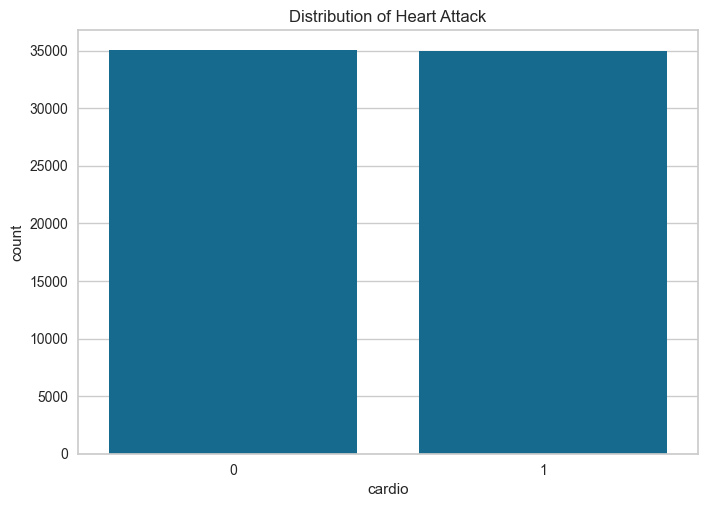

In [101]:
sns.countplot(x='cardio', data=kentang)
plt.title('Distribution of Heart Attack')
plt.show()

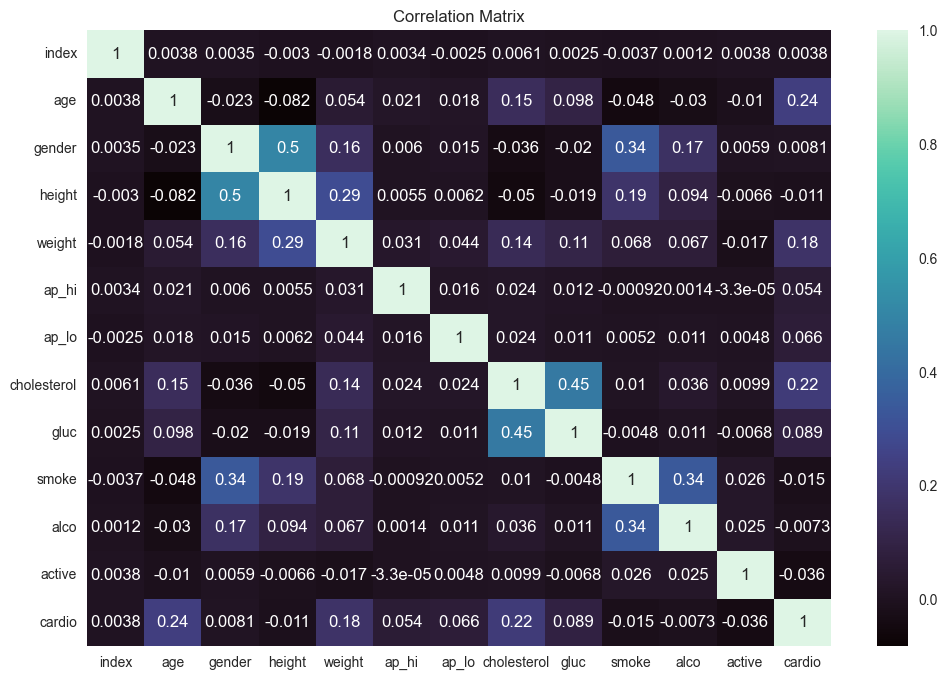

In [102]:
# Korelasi antar variabel
corr_matrix = kentang.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

# Memilih fitur penting berdasarkan korelasi
important_features = corr_matrix.index[abs(corr_matrix["cardio"]) > 0.1].tolist()
kentang_reduced = kentang[important_features]


Matriks korelasi menunjukkan koefisien korelasi pasangan variabel dalam dataset tersebut, yang memberikan wawasan tentang bagaimana setiap variabel saling berhubungan.

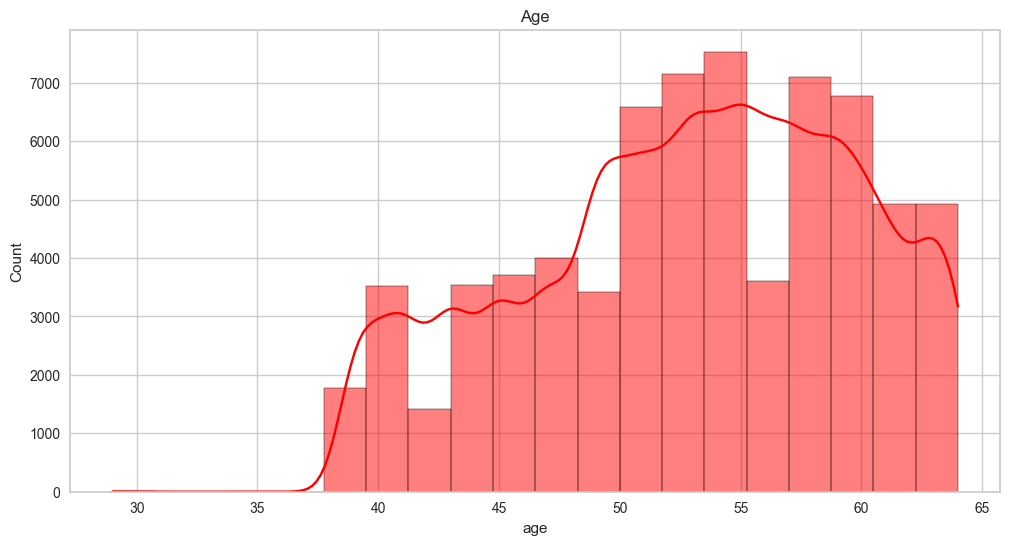

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(x=kentang["age"], kde=True, color="red", bins=20)
plt.title("Age")
plt.show()

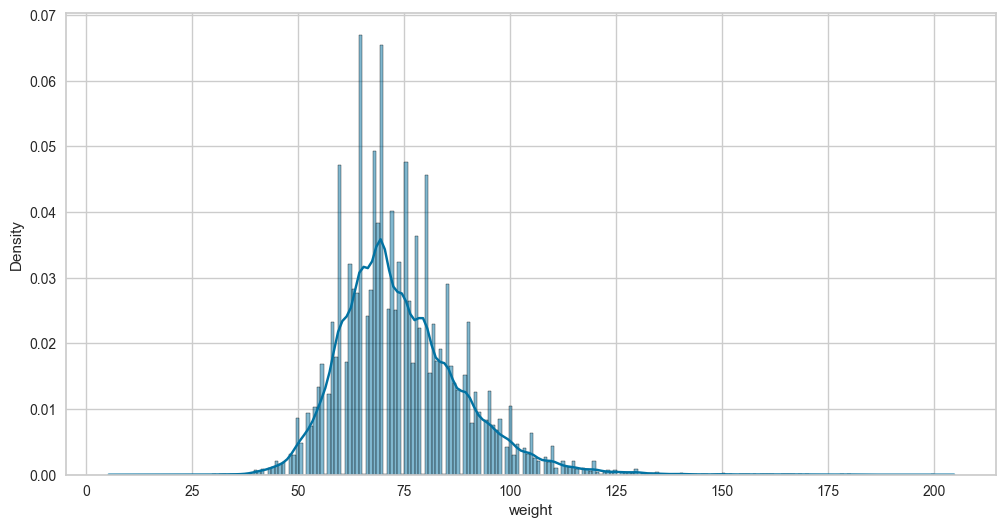

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(kentang['weight'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

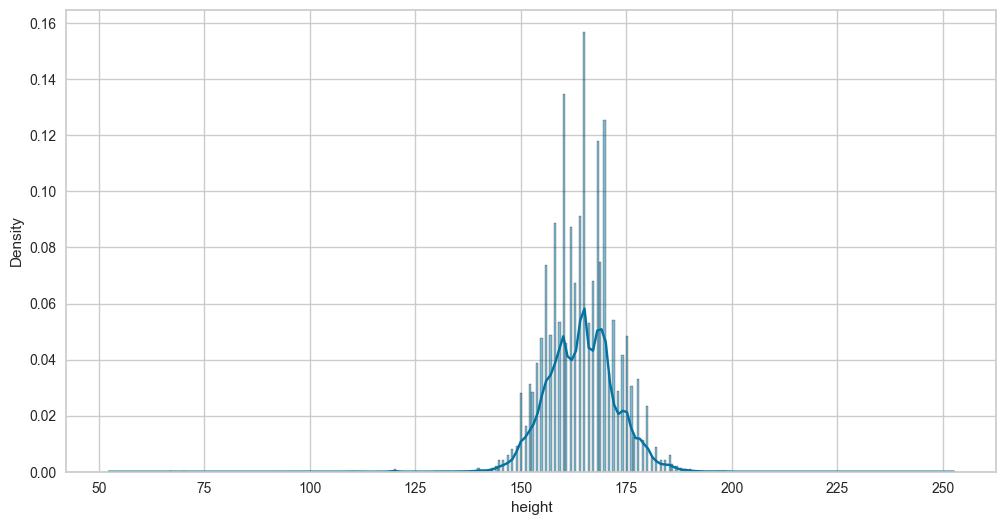

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(kentang['height'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

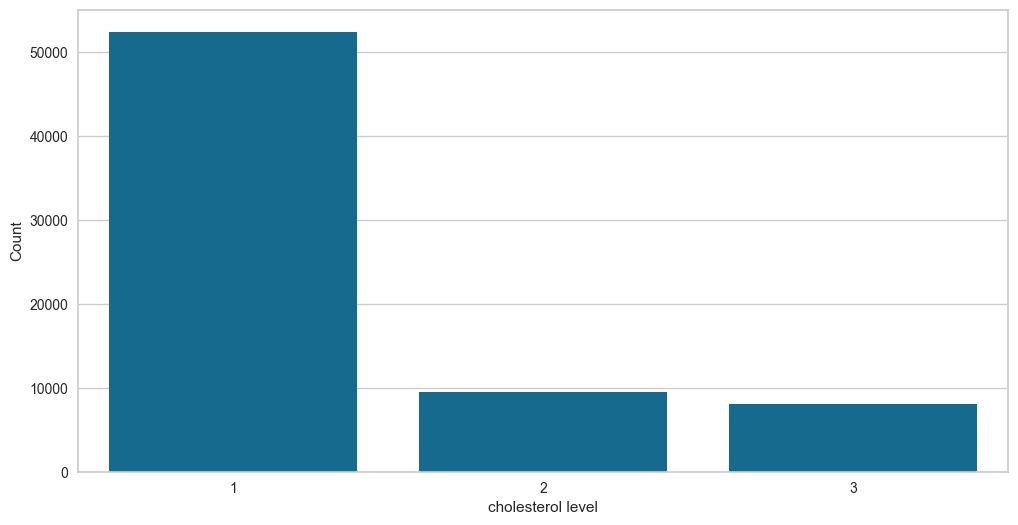

In [106]:
chol = kentang['cholesterol'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=chol.index, y=chol.values)
plt.xlabel('cholesterol level')
plt.ylabel('Count')
plt.show()

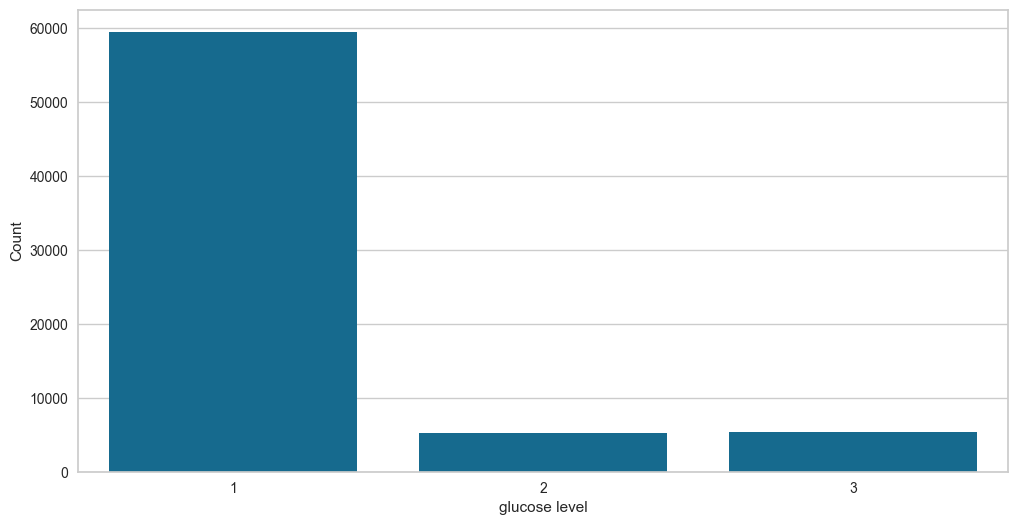

In [107]:
g = kentang['gluc'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=g.index, y=g.values)
plt.xlabel('glucose level')
plt.ylabel('Count')
plt.show()

In [108]:
kentang.columns

Index(['index', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

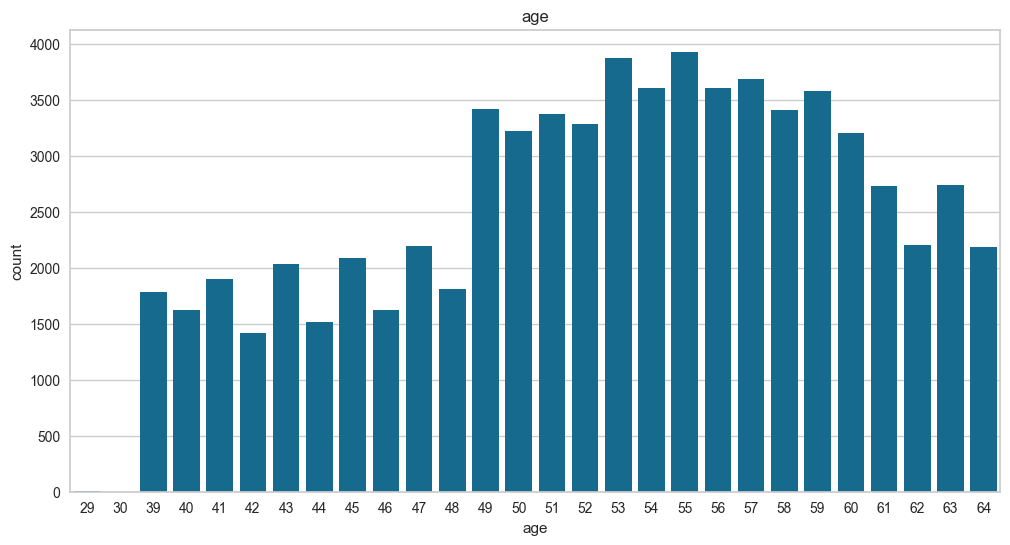

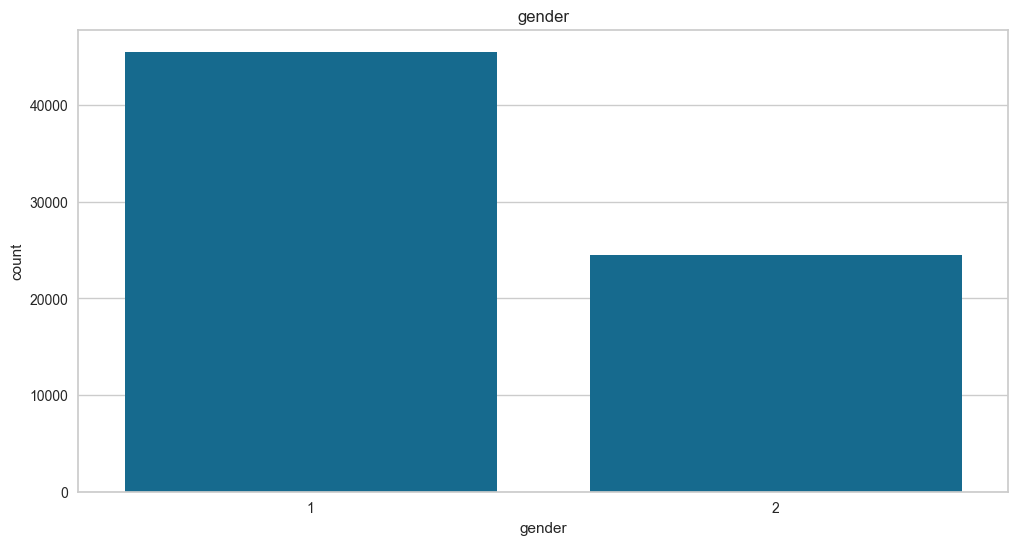

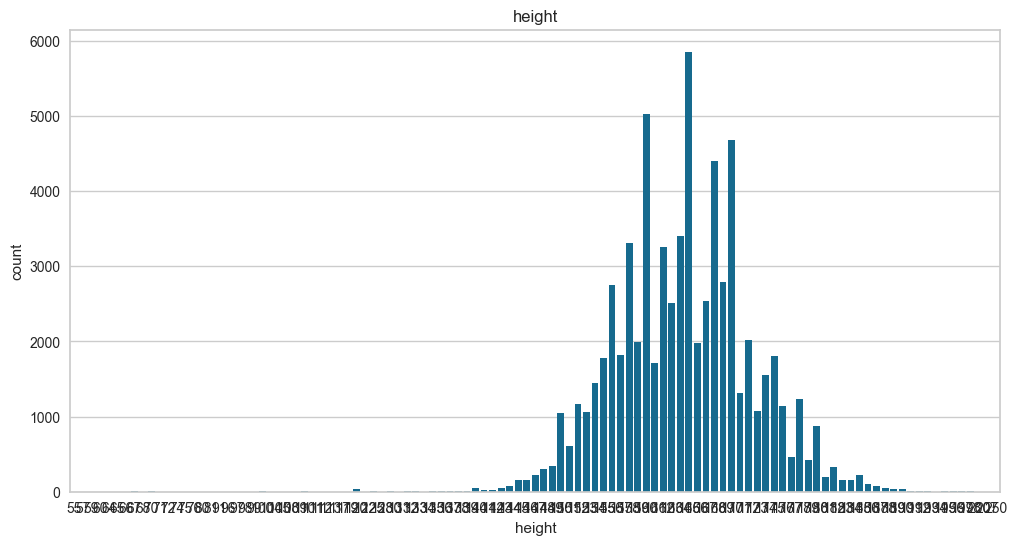

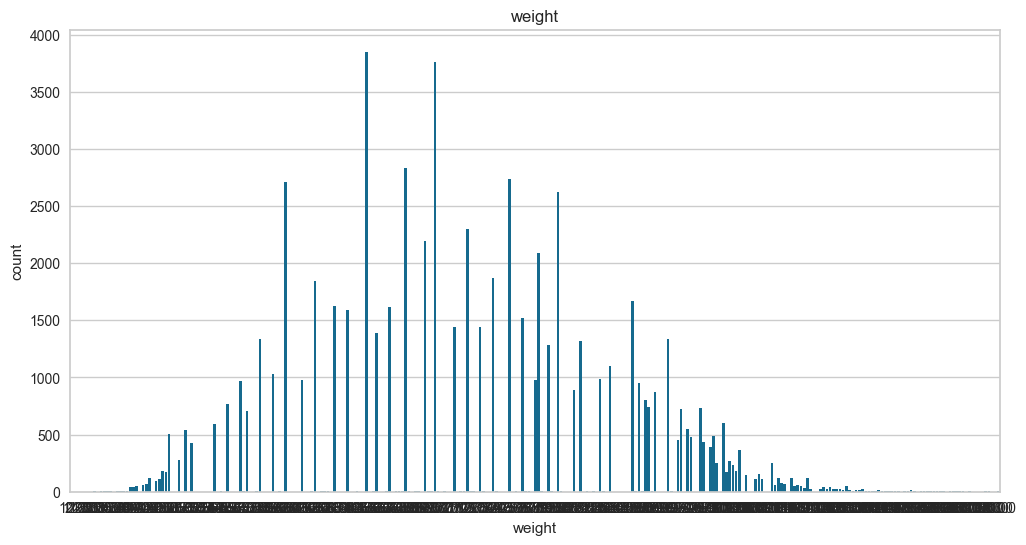

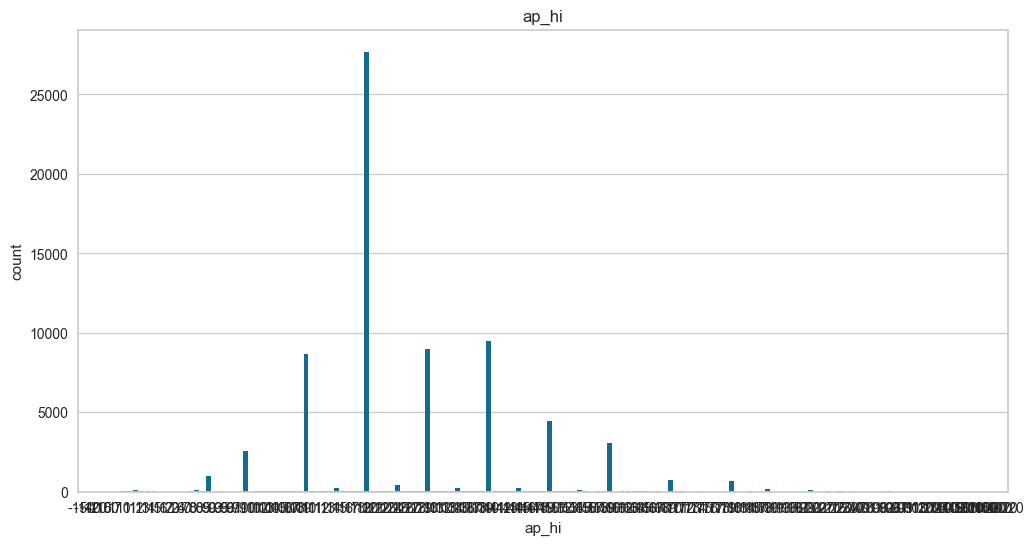

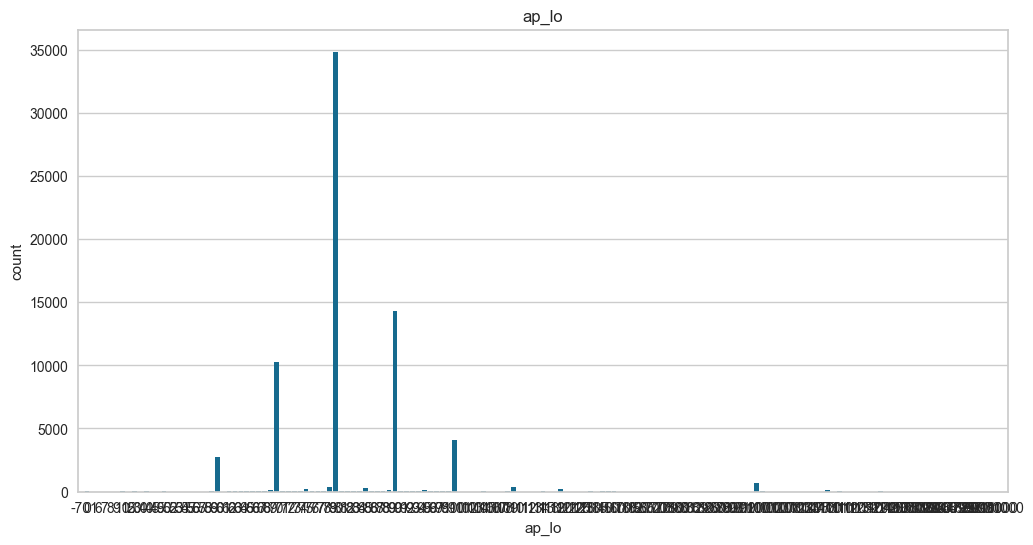

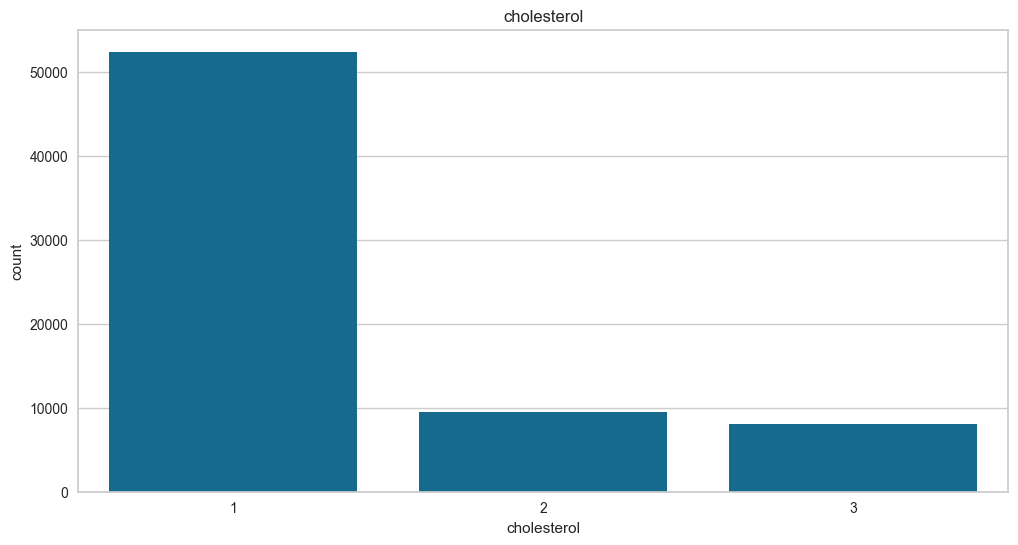

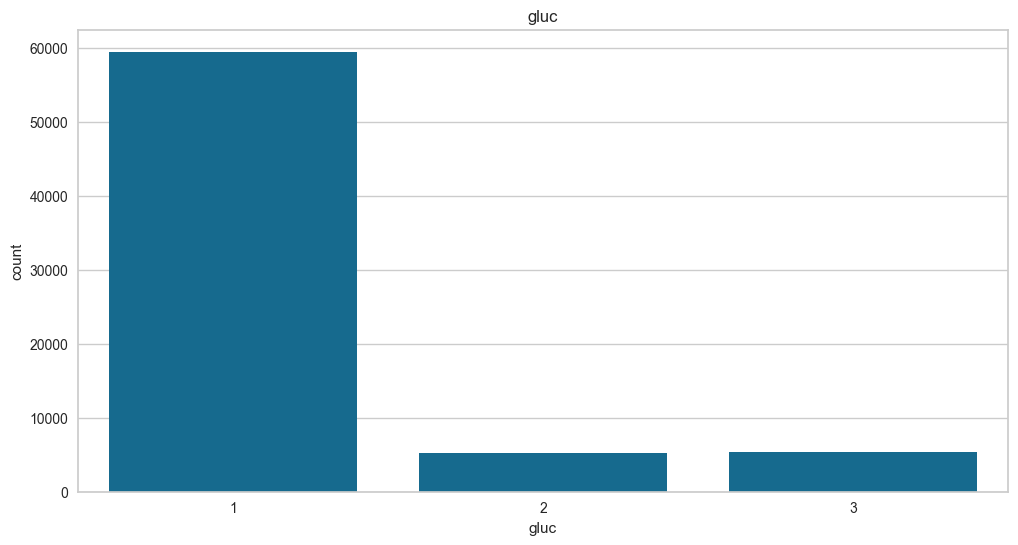

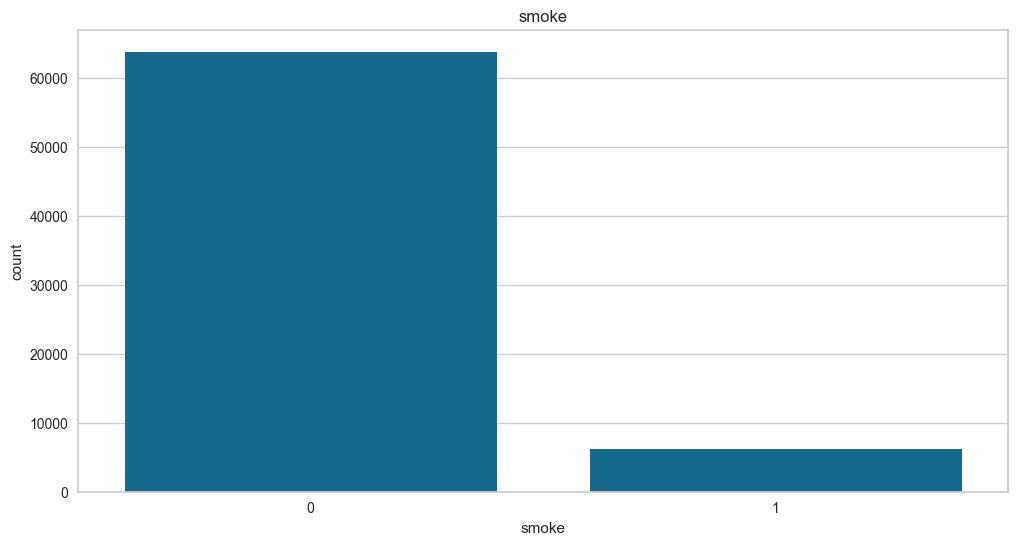

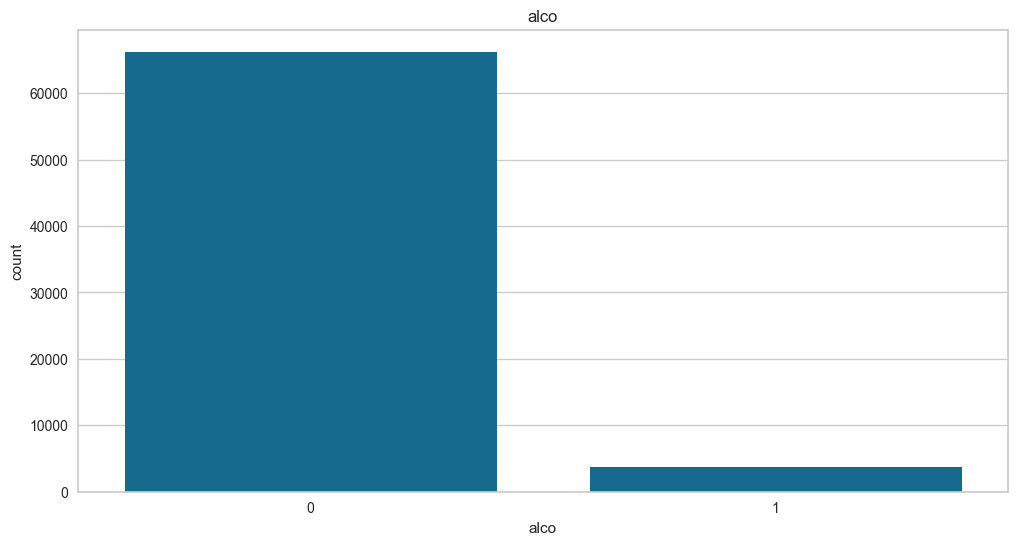

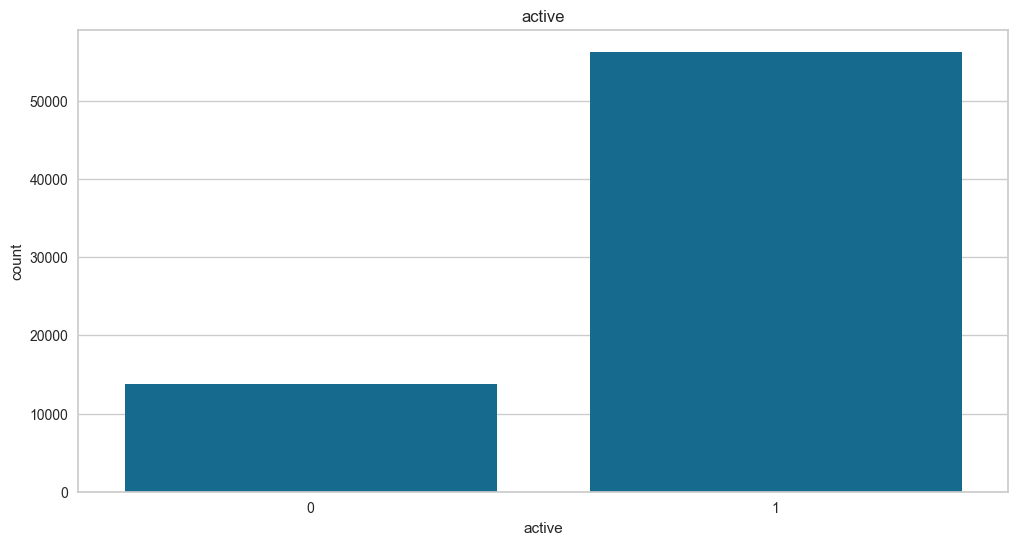

In [109]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,data=kentang)
    plt.title(col)
    plt.show()

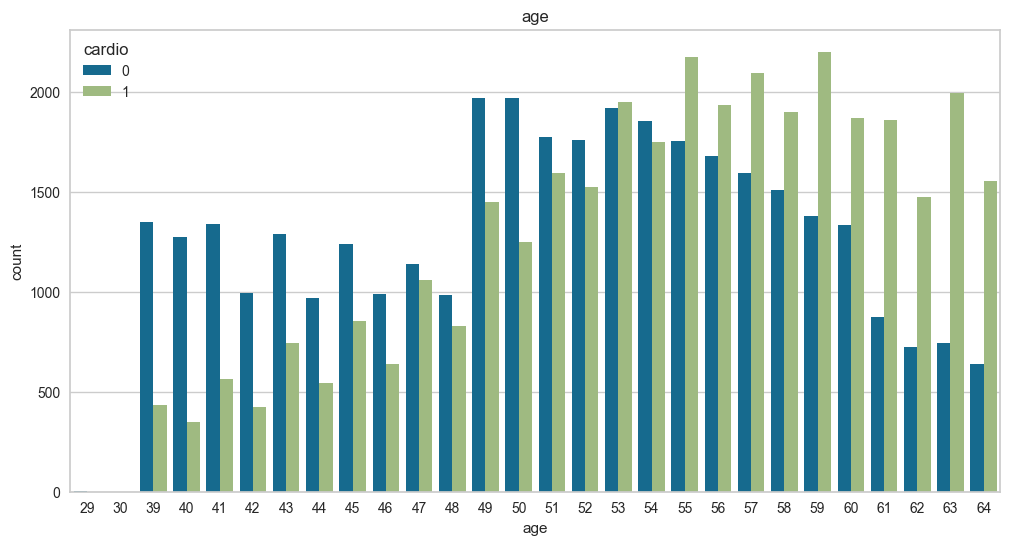

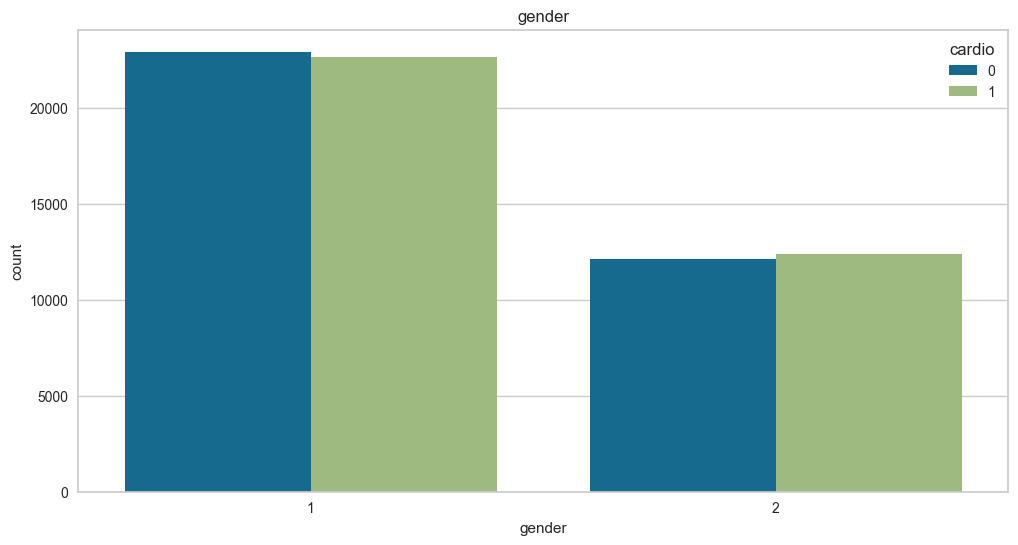

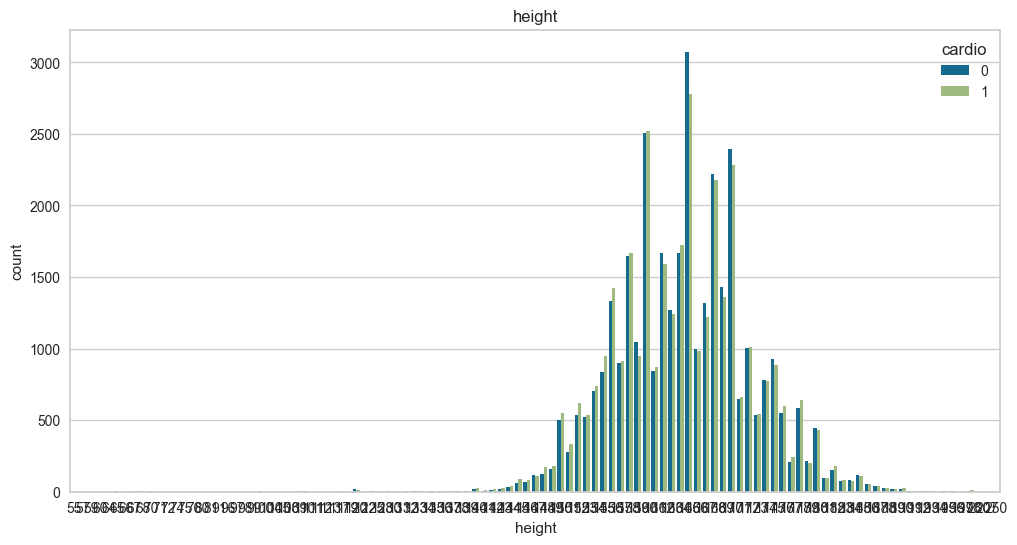

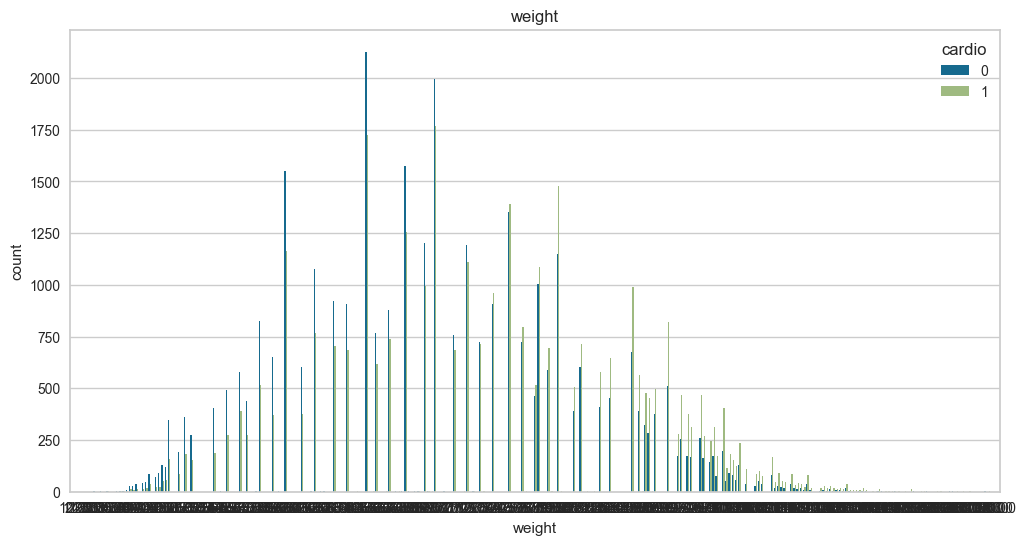

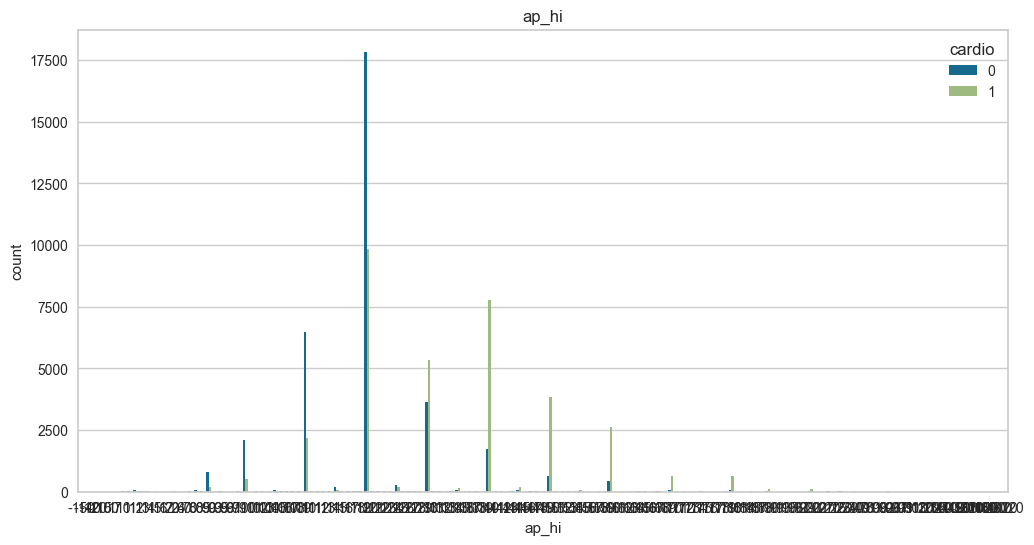

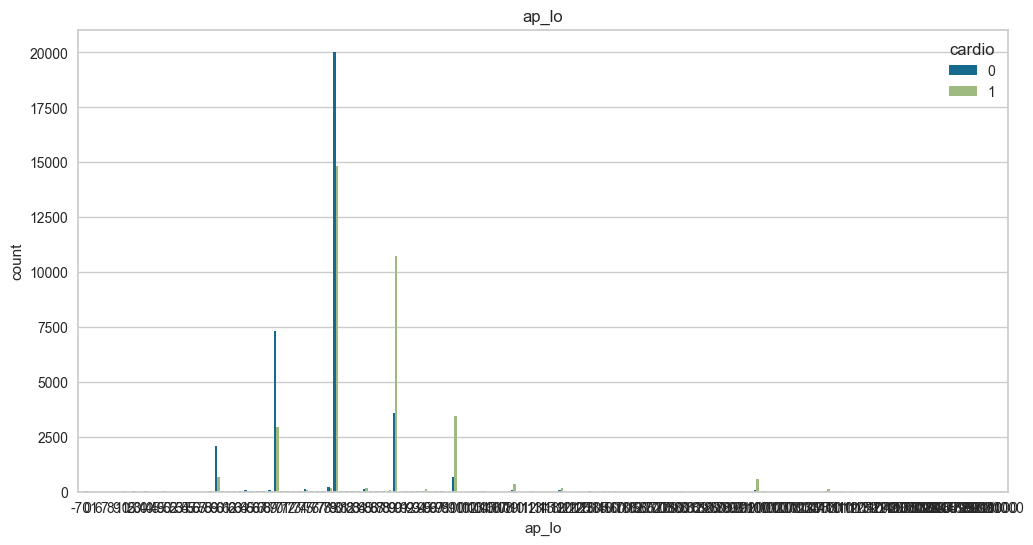

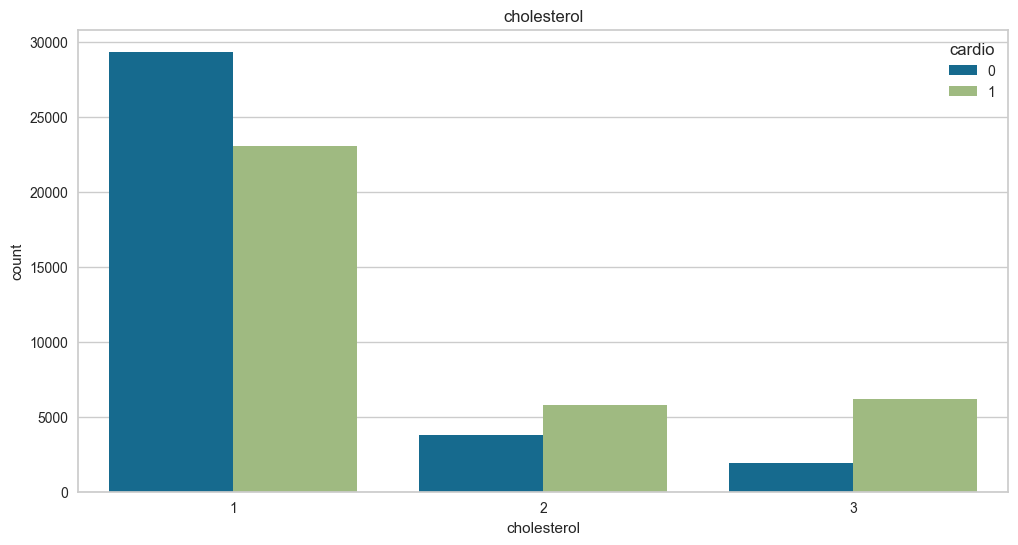

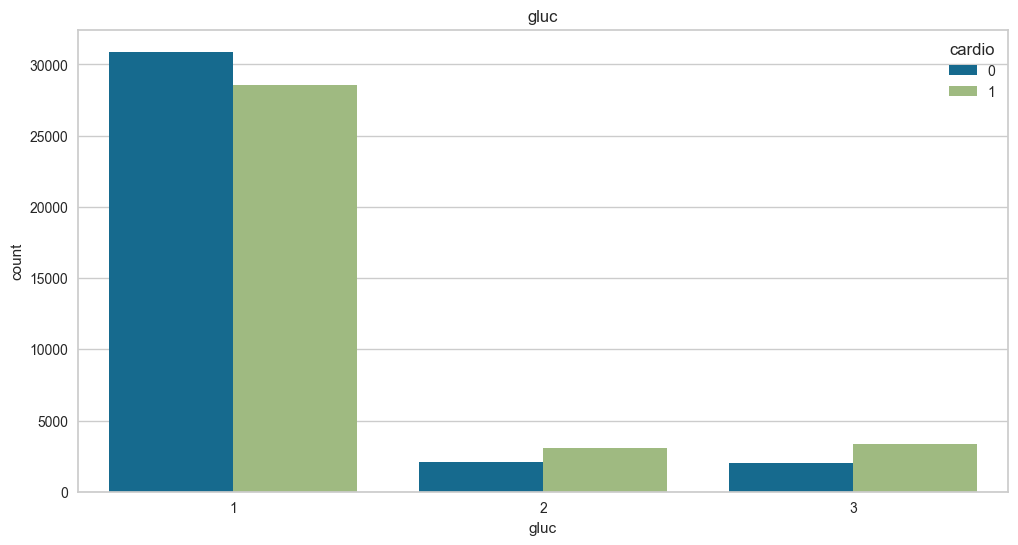

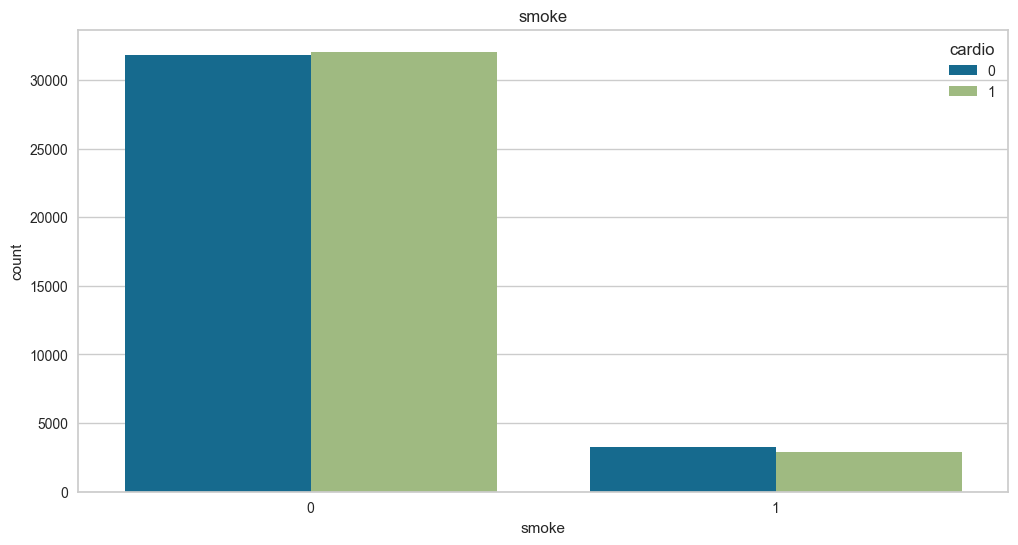

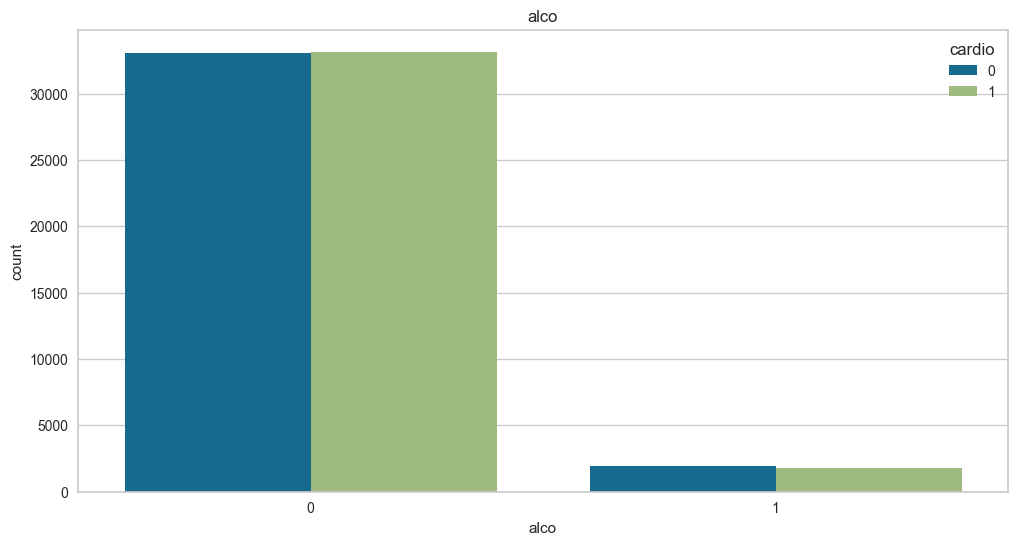

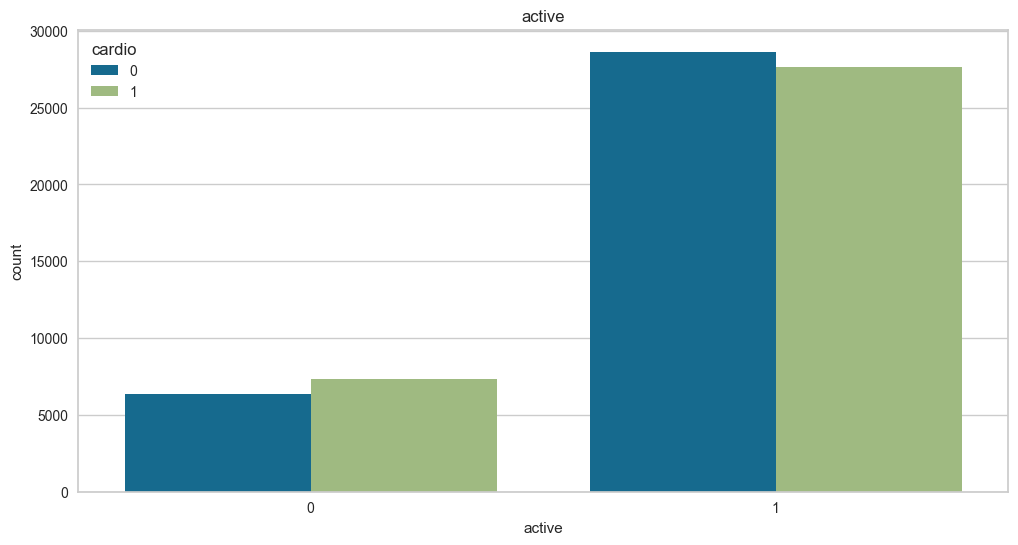

In [110]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,hue='cardio',data=kentang)
    plt.title(col)
    plt.show()

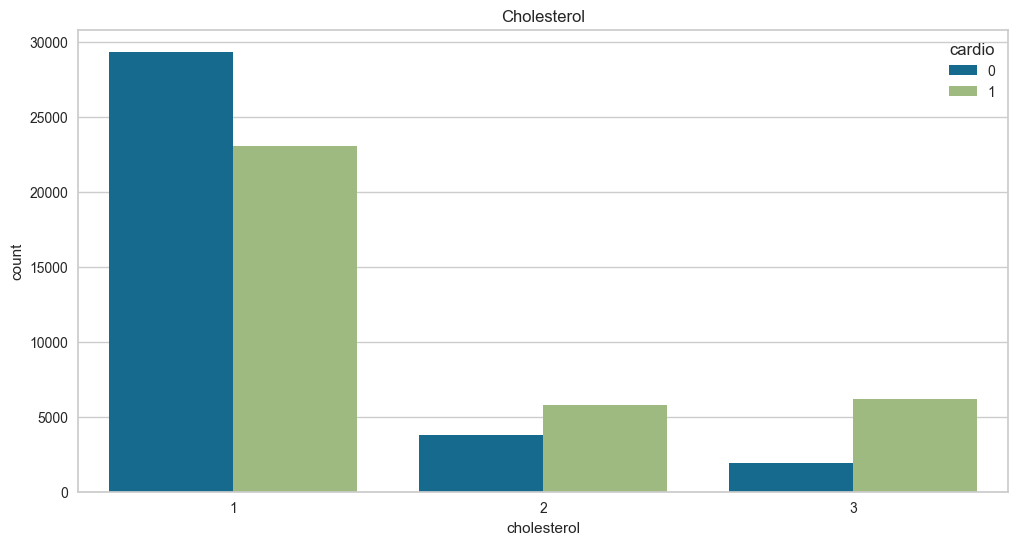

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x='cholesterol',hue='cardio',data=kentang)
plt.title('Cholesterol')
plt.show()

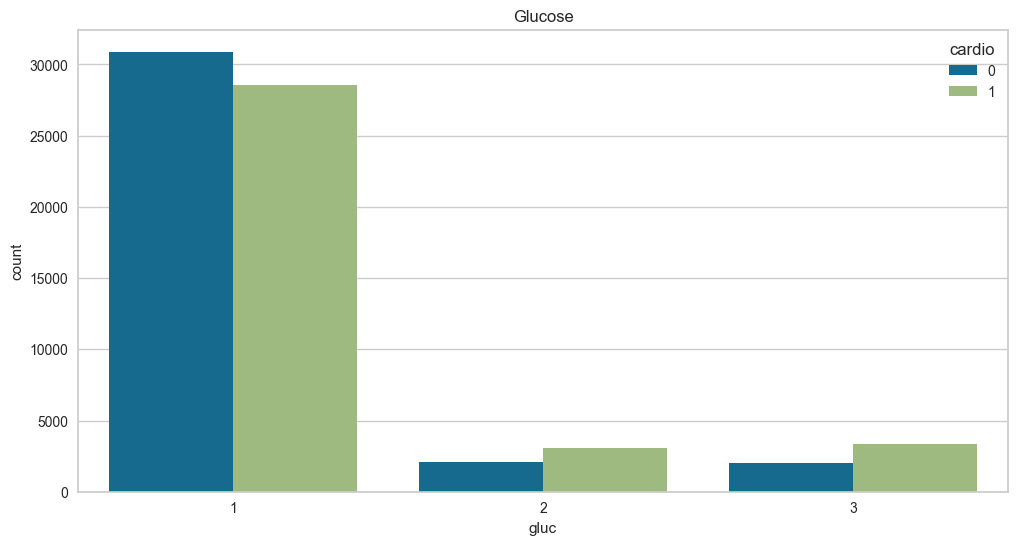

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x='gluc',hue='cardio',data=kentang)
plt.title('Glucose')
plt.show()

In [113]:
kentang["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [114]:
y = kentang['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

Spliting data

In [115]:
from sklearn.model_selection import train_test_split

kita buat featurenya

In [116]:
feature = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

X = kentang[feature].values
y = kentang['cardio'].values

kita menggunakan 8:2

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [118]:
X_train, X_test, y_train, y_test.shape

(array([[ 52.,   2., 162., ...,   0.,   0.,   0.],
        [ 47.,   1., 158., ...,   0.,   0.,   1.],
        [ 52.,   1., 165., ...,   0.,   0.,   1.],
        ...,
        [ 54.,   2., 170., ...,   0.,   0.,   0.],
        [ 57.,   1., 169., ...,   0.,   0.,   0.],
        [ 52.,   1., 166., ...,   0.,   0.,   1.]]),
 array([[ 53.,   1., 155., ...,   0.,   0.,   1.],
        [ 57.,   1., 160., ...,   0.,   0.,   1.],
        [ 41.,   2., 175., ...,   0.,   0.,   1.],
        ...,
        [ 59.,   1., 159., ...,   0.,   0.,   1.],
        [ 50.,   1., 165., ...,   0.,   0.,   1.],
        [ 57.,   2., 163., ...,   0.,   0.,   1.]]),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 (14000,))

In [119]:
print('Data Train = ', X_train.shape, y_train.shape)
print('Data Test = ', X_test.shape, y_test.shape)

Data Train =  (56000, 11) (56000,)
Data Test =  (14000, 11) (14000,)


In [120]:
kentang.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:11, :])

[[-0.12366021  1.36544869 -0.28492964  0.61001911 -0.05596846 -0.08678288
  -0.53940814 -0.39607252 -0.31031925 -0.23661387 -2.03145186]
 [-0.86417218 -0.73236    -0.77113918 -0.71037738 -0.05596846 -0.08678288
  -0.53940814 -0.39607252 -0.31031925 -0.23661387  0.49225877]
 [-0.12366021 -0.73236     0.07972751  1.44395373  0.19163215  0.01654116
   0.93137071 -0.39607252 -0.31031925 -0.23661387  0.49225877]
 [ 0.32064697 -0.73236    -0.04182487  0.61001911  0.129732    0.01654116
  -0.53940814 -0.39607252 -0.31031925 -0.23661387  0.49225877]
 [-0.56796739 -0.73236    -1.01424394 -1.544312   -0.17976877 -0.15394351
  -0.53940814 -0.39607252 -0.31031925 -0.23661387 -2.03145186]]


In [122]:
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'MLP Neural Network': {
        'hidden_layer_sizes': [(50,50), (100,), (100,50,50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }
}

tuned_model_performance = {}

In [123]:
best_estimators = {}

for name, params in param_grids.items():
    print(f"Tuning hyperparameters for {name}...")
    if name == 'Logistic Regression':
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression()
    elif name == 'Decision Tree':
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
    elif name == 'SVM':
        from sklearn.svm import SVC
        model = SVC()
    elif name == 'KNN':
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier()
    elif name == 'MLP Neural Network':
        from sklearn.neural_network import MLPClassifier
        model = MLPClassifier()

    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_model_performance[name] = accuracy
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Accuracy after tuning: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# Print final results

Tuning hyperparameters for Logistic Regression...
Logistic Regression Best Parameters: {'C': 10, 'solver': 'liblinear'}
Logistic Regression Accuracy after tuning: 0.71
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000

Tuning hyperparameters for Decision Tree...
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 20}
Decision Tree Accuracy after tuning: 0.72
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7004
           1       0.74      0.68      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Tuning hyperparame

In [124]:
print("Model Performance after Hyperparameter Tuning:")
for name, accuracy in tuned_model_performance.items():
    print(f"{name}: {accuracy:.2f}")

Model Performance after Hyperparameter Tuning:
Logistic Regression: 0.71
Decision Tree: 0.72
SVM: 0.73
KNN: 0.65
MLP Neural Network: 0.73


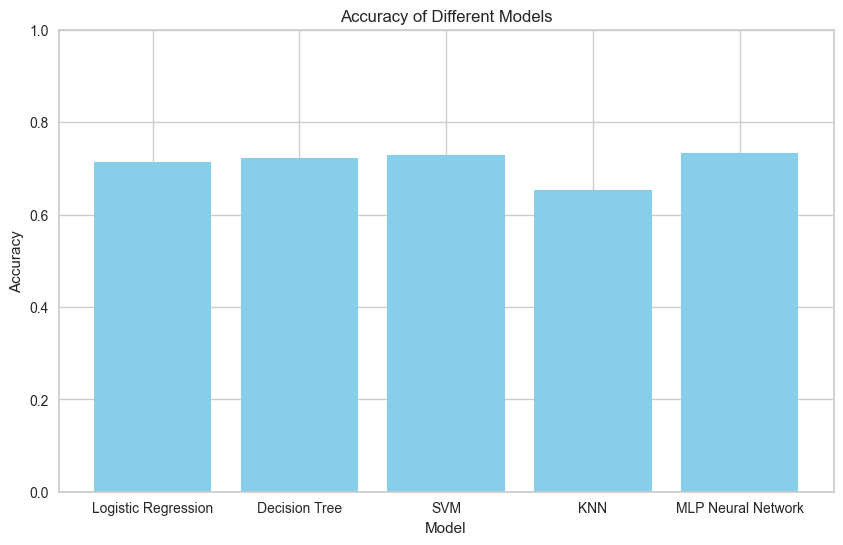

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(list(tuned_model_performance.keys()), list(tuned_model_performance.values()), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Ensure the y-axis starts at 0 and ends at 1
plt.show()

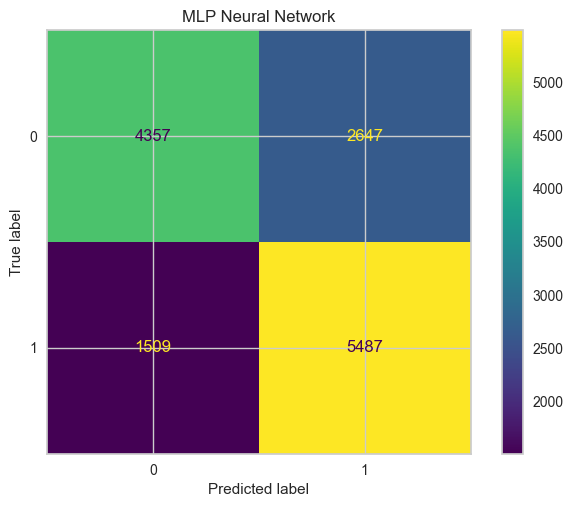

In [126]:
model2 = MLPClassifier()
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# Compute the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2, labels=model2.classes_)

# Display the confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot()
plt.title('MLP Neural Network')
plt.show()


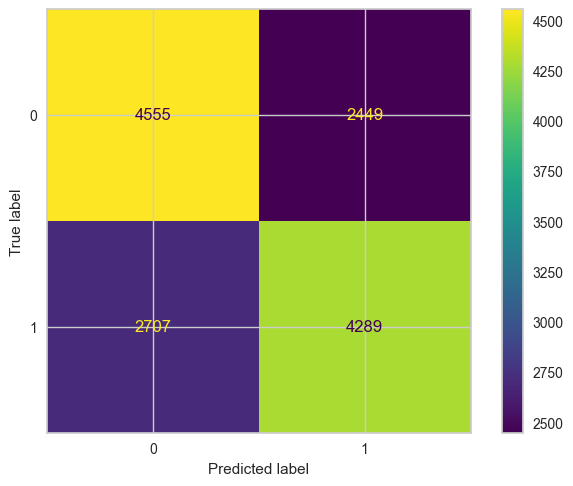

In [127]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()
plt.show()

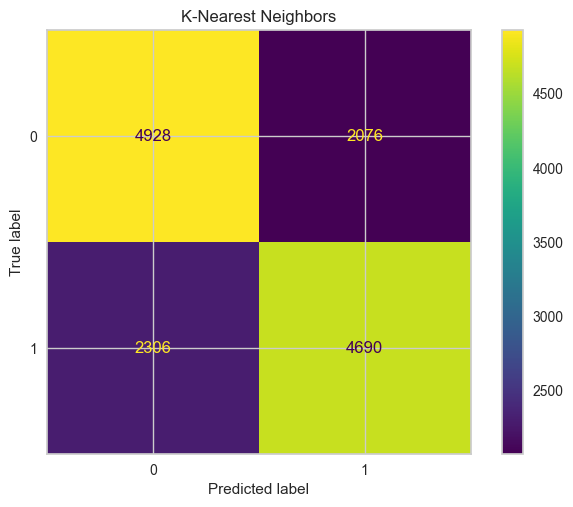

In [128]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test)

# Compute the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3, labels=model3.classes_)

# Display the confusion matrix
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=model3.classes_)
disp3.plot()
plt.title('K-Nearest Neighbors')
plt.show()

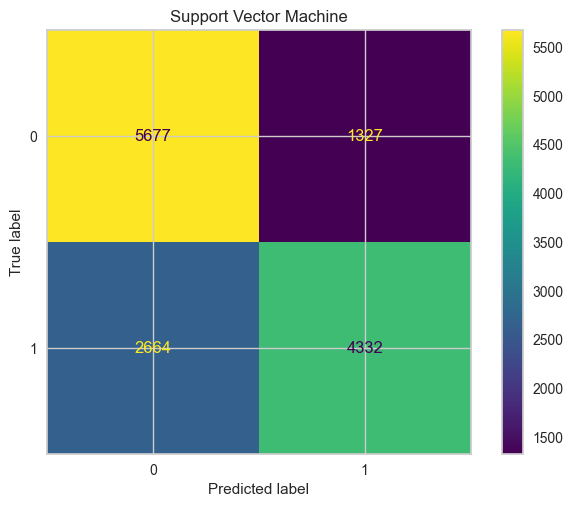

In [129]:
model4 = SVC()
model4.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = model4.predict(X_test)

# Compute the confusion matrix
cm4 = confusion_matrix(y_test, y_pred4, labels=model4.classes_)

# Display the confusion matrix
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=model4.classes_)
disp4.plot()
plt.title('Support Vector Machine')
plt.show()

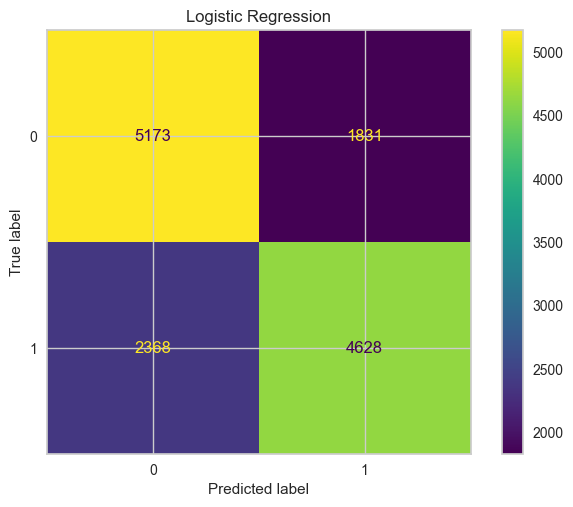

In [130]:
model5 = LogisticRegression()
model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred5 = model5.predict(X_test)

# Compute the confusion matrix
cm5 = confusion_matrix(y_test, y_pred5, labels=model5.classes_)

# Display the confusion matrix
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=model5.classes_)
disp5.plot()
plt.title('Logistic Regression')
plt.show()

In [131]:
age = 18 #@param {type:"float"}
gender = 1 #@param [1, 2]{type:"raw"}
height = 170#@param {type:"number"}
weight = 60.0#@param {type:"number"}
ap_hi = 120#@param {type:"number"}
ap_lo = 80#@param {type:"number"}
cholesterol = 3 #@param [0, 1, 2, 3]{type:"raw"}
gluc = 2 #@param [0, 1, 2]{type:"raw"}
smoke = 1 #@param [0, 1]{type:"raw"}
alco = 1 #@param [0, 1]{type:"raw"}
active = 1 #@param [0, 1]{type:"raw"}
cardio = 1 #@param [0, 1]{type:"raw"}

data_baru = [['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
data_baru_transformed = scaler.transform(data_baru)

hasil_prediksi = best_model.predict(data_baru_transformed)
hasil_prediksi = int(hasil_prediksi)

print(f'Pasien tersebut diprediksi ', end='')
if hasil_prediksi == 0:
    print('tidak terkena penyakit jantung!')
else:
    print('terkena penyakit jantung!')


ValueError: could not convert string to float: 'age'

ubah di data preprosesing age float

pakai feature feature yang relevan dengan corelasi tinggi

In [132]:
import joblib
import pickle

In [133]:
pickle.dump(scaler, open('scalerjantung_ds.pkl', 'wb'))
pickle.dump(model, open('jantung_ds.pkl', 'wb'))

In [135]:
model2 = MLPClassifier()
model.fit(X_train, y_train)

# Save the scaler and model
with open('scalerjantung_ds.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('jantung_ds.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [136]:
pickled_scaler = pickle.load(open('scalerjantung_ds.pkl', 'rb'))
pickled_model = pickle.load(open('jantung_ds.pkl', 'rb'))